In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
    
)
imgae_generator_test = ImageDataGenerator(
    rescale=1./255.,
)

In [10]:
train_data = image_generator.flow_from_directory(
    'data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 550 images belonging to 2 classes.


In [11]:
test_data = image_generator.flow_from_directory(
    'test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 74 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
weights = compute_class_weight('balanced', classes=np.unique(train_data.classes), y=train_data.classes)

In [24]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [25]:
class_weights

{0: 1.3959390862944163, 1: 0.7790368271954674}

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [27]:
mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [28]:
history = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop, mch], class_weight=class_weights)

C:\Users\Hacker\AppData\Local\Temp\ipykernel_10648\2160343206.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop, mch], class_weight=class_weights)


Epoch 1/30
11/11 [==============================] - 69s 6s/step - loss: 0.7474 - accuracy: 0.5291 - val_loss: 0.6673 - val_accuracy: 0.5676 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 67s 6s/step - loss: 0.6111 - accuracy: 0.6236 - val_loss: 0.4186 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 63s 6s/step - loss: 0.5724 - accuracy: 0.6800 - val_loss: 0.4815 - val_accuracy: 0.7432 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 66s 6s/step - loss: 0.5140 - accuracy: 0.7400 - val_loss: 0.3723 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 5/30
11/11 [==============================] - 66s 6s/step - loss: 0.4072 - accuracy: 0.8382 - val_loss: 0.6254 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 6/30
11/11 [==============================] - 68s 6s/step - loss: 0.4067 - accuracy: 0.8036 - val_loss: 0.3730 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 7/30
11/11 [==============================] - 70s 6s/step - loss: 0.3377 - a

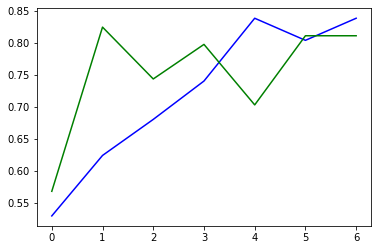

In [29]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

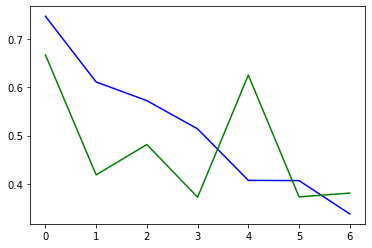

In [30]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')